In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

link = "https://platform.stratascratch.com/data-projects/student-performance-analysis"

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Features to analyze:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) <br>
2 sex - student's sex (binary: 'F' - female or 'M' - male) <br>
3 age - student's age (numeric: from 15 to 22) <br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) <br>
5 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) <br>
6 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) <br>
7 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <br>
8 failures - number of past class failures (numeric: n if 1<=n<3, else 4) <br>

These grades are related with the course subject, Math or Portuguese: <br>
9 G1 - first period grade (numeric: from 0 to 20) <br>
10 G2 - second period grade (numeric: from 0 to 20) <br>
11 G3 - final grade (numeric: from 0 to 20, output target) <br>

Data description from UCI: https://archive.ics.uci.edu/dataset/320/student+performance

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.shape

(395, 33)

In [6]:
data = ["school", "sex", "age", "address", "Medu", "Fedu", "studytime", "activities", "romantic", "failures", "internet", "paid", "G1", "G2", "G3"]

In [7]:
student = df[data]
student.head()

,school,sex,age,address,Medu,Fedu,studytime,activities,romantic,failures,internet,paid,G1,G2,G3
0,GP,F,18,U,4,4,2,no,no,0,no,no,5,6,6
1,GP,F,17,U,1,1,2,no,no,0,yes,no,5,5,6
2,GP,F,15,U,1,1,2,no,no,3,yes,yes,7,8,10
3,GP,F,15,U,4,2,3,yes,yes,0,yes,yes,15,14,15
4,GP,F,16,U,3,3,2,no,no,0,no,yes,6,10,10


In [8]:
# Check for null values
student.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
activities    0
romantic      0
failures      0
internet      0
paid          0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# Check for unique values
for col in student.columns:
    print(f"{col}: {student[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
studytime: [2 3 1 4]
activities: ['no' 'yes']
romantic: ['no' 'yes']
failures: [0 3 2 1]
internet: ['no' 'yes']
paid: ['no' 'yes']
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


# Data Visualization

In [10]:
student_num = student[["age", "failures", "G1", "G2", "G3"]]

## Histograms
To understand data distribution

Age mean: 16.6962


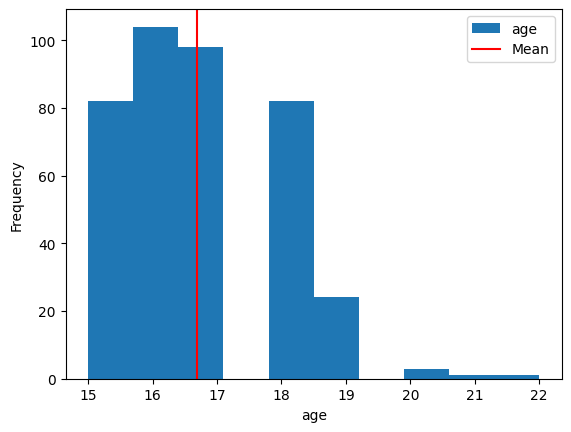

Failures mean: 0.3342


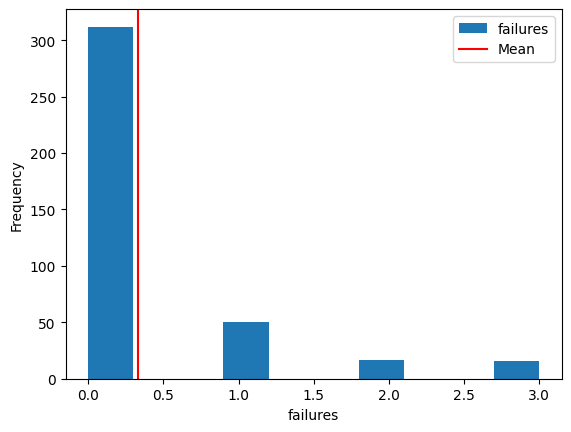

G1 mean: 10.9089


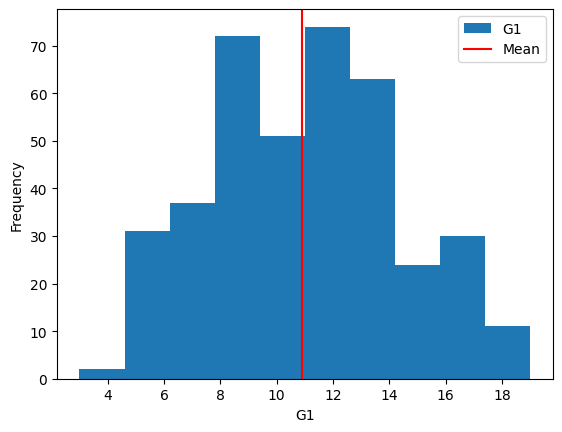

G2 mean: 10.7139


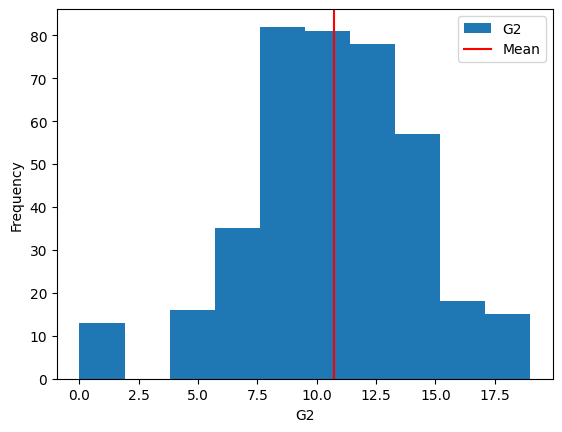

G3 mean: 10.4152


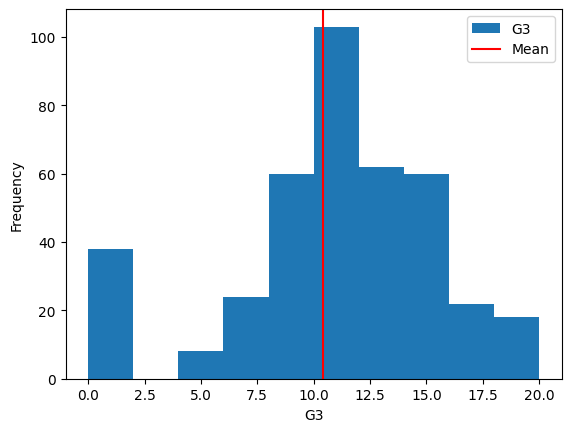

In [11]:
for col in student_num.columns:
    mean = student[col].mean()
    print(f"{col.capitalize()} mean: {round(mean, 4)}")
    student_num[col].plot(kind="hist", xlabel=col)
#     student_num[col].plot(kind="density")
    plt.axvline(mean, color="red", label="Mean")
    plt.legend()
    plt.show()

## Boxplots
For outlier detection and spread of data

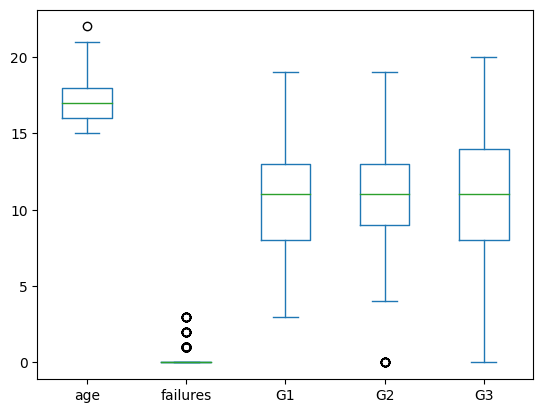

age
22     1
Name: count, dtype: int64

failures
1           50
2           17
3           16
Name: count, dtype: int64

G1: No outliers

G2
0     13
Name: count, dtype: int64

G3: No outliers



In [12]:
box = student_num.plot(kind="box")
plt.show()

for col in student_num.columns:
    q1, q3 = student_num[col].quantile(.25), student_num[col].quantile(.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier = pd.DataFrame(student_num.loc[(student_num[col]<lower_bound) | (student_num[col]>upper_bound), col])
    
    if not outlier.empty:
        print(outlier.value_counts())
        print()
    else: 
        print(f"{col}: No outliers\n")
        

## Bar Charts
To compare averages in each categories

In [13]:
cat_cols = ["school", "sex", "address", "Medu", "Fedu", "studytime", "activities", "romantic", "internet", "paid"]
student_cat = student[cat_cols].astype(str)

overall_avg = (student.G1 + student.G2 + student.G3) / 3

student_cat_avg = pd.concat([student_cat, overall_avg.rename("overall_avg")], axis=1)

student_cat_avg.head()

,school,sex,address,Medu,Fedu,studytime,activities,romantic,internet,paid,overall_avg
0,GP,F,U,4,4,2,no,no,no,no,5.666667
1,GP,F,U,1,1,2,no,no,yes,no,5.333333
2,GP,F,U,1,1,2,no,no,yes,yes,8.333333
3,GP,F,U,4,2,3,yes,yes,yes,yes,14.666667
4,GP,F,U,3,3,2,no,no,no,yes,8.666667


In [14]:
# Aggregate 
avg_school = student_cat_avg.groupby("school")["overall_avg"].mean()
avg_sex = student_cat_avg.groupby("sex")["overall_avg"].mean()
avg_address = student_cat_avg.groupby("address")["overall_avg"].mean()
avg_Medu = student_cat_avg.groupby("Medu")["overall_avg"].mean()
avg_Fedu = student_cat_avg.groupby("Fedu")["overall_avg"].mean()
avg_studytime = student_cat_avg.groupby("studytime")["overall_avg"].mean()
avg_activities = student_cat_avg.groupby("activities")["overall_avg"].mean()
avg_romantic = student_cat_avg.groupby("romantic")["overall_avg"].mean()
avg_internet = student_cat_avg.groupby("internet")["overall_avg"].mean()
avg_paid = student_cat_avg.groupby("paid")["overall_avg"].mean()

avg_cats = [avg_school, avg_sex, avg_address, avg_Medu, avg_Fedu, avg_studytime, avg_activities, avg_romantic, avg_internet, avg_paid]

for i in range(len(avg_cats)):
    avg_cats[i].name = cat_cols[i]

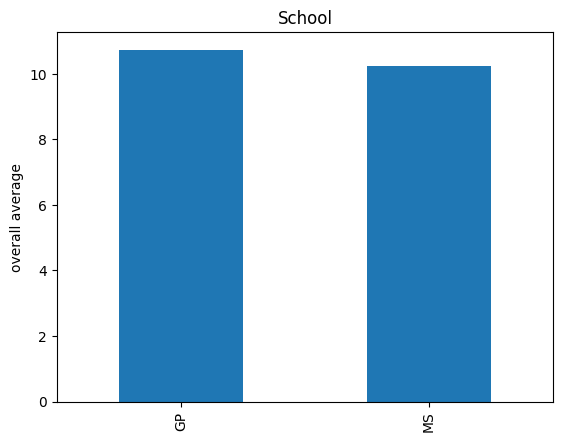

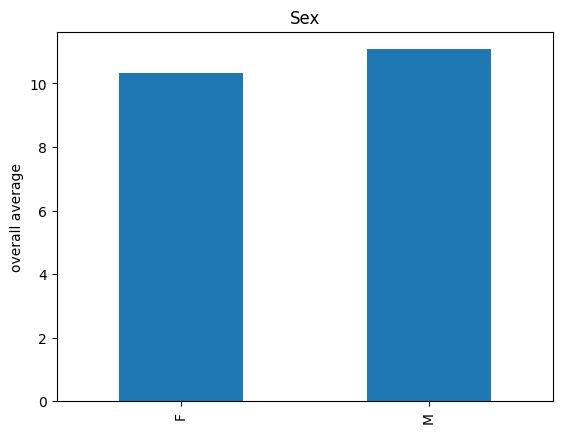

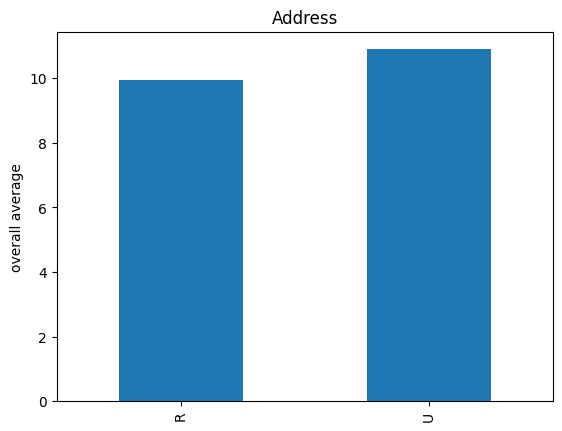

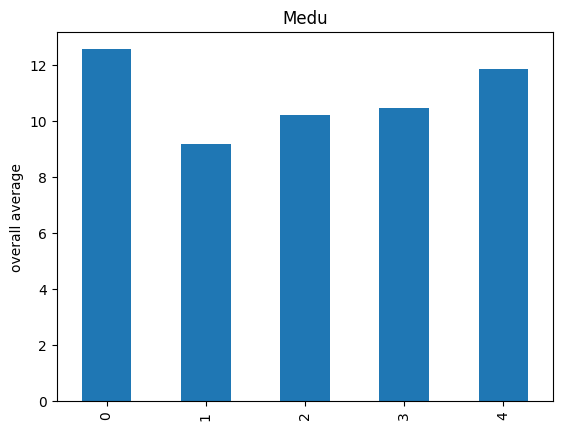

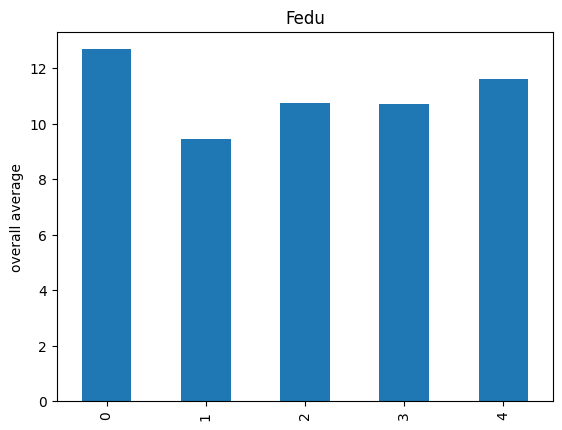

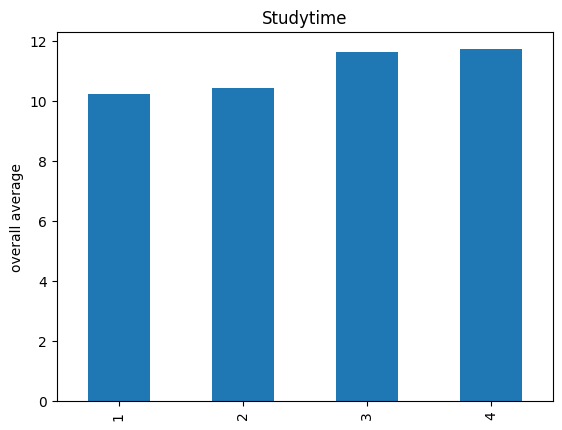

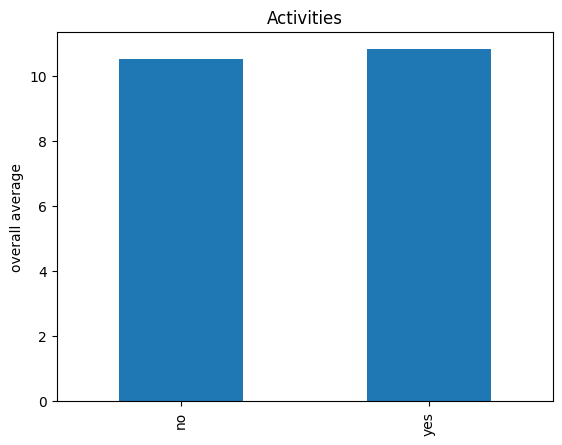

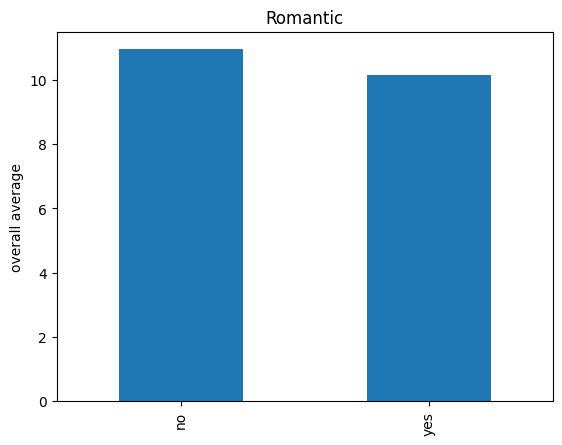

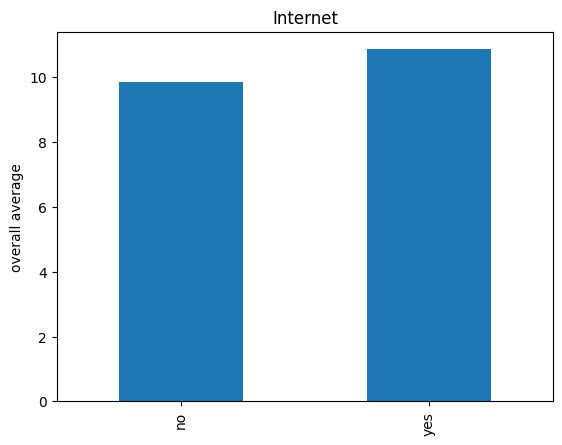

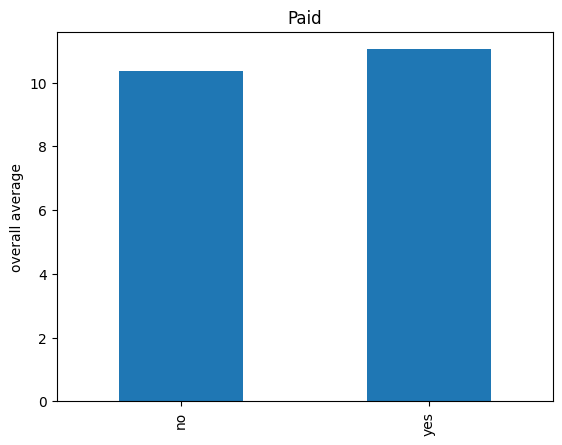

In [15]:
for col in avg_cats:
    col.plot(kind="bar", ylabel="overall average", xlabel="")
    plt.title(col.name.capitalize())
    plt.show()

# Statistical Tests

## Chi-Square Test of Independence

In [16]:
student_cat.columns

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'studytime', 'activities',
       'romantic', 'internet', 'paid'],
      dtype='object')

In [17]:
def chi_square(col_1, col_2, display=True):
    """
    Calculates the chi-square stats
    
    parameters:
    col1: DataFrame column
    col2: DataFrame column
    
    returns:
    chi2: chi-square stat
    p: p-value
    dof: degrees of freedom
    expected: expected frequencies
    
    """
    contingency_table = pd.crosstab(col_1, col_2)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    contingency_table.reset_index(drop=True, inplace=True)
    if display:
        print(f"Chi2 : {chi2}")
        print(f"p-value : {p}")
        print(f"Degrees of freedom : {dof}")
        
    
    return contingency_table, chi2, p, dof, expected

In [18]:
print("Level of significance: .05\n")

print("Address and StudyTime Chi-square test of Independence")
table1, chi1, p1, dof1, expected1 = chi_square(student_cat.address, student_cat.studytime)

print()

print("Romantic and StudyTime Chi-square test of Independence")
table2, chi2, p2, dof2, expected2 = chi_square(student_cat.romantic, student_cat.studytime)

print()

print("Romantic and Activities Chi-square test of Independence")
table3, chi3, p3, dof3, expected3 = chi_square(student_cat.romantic, student_cat.activities)

print()

print("Paid and Internet Chi-square test of Independence")
table4, chi4, p4, dof4, expected4 = chi_square(student_cat.paid, student_cat.internet)

print()

print("Medu and Paid Chi-square test of Independence")
table5, chi5, p5, dof5, expected5 = chi_square(student_cat.paid, student_cat.Medu)

print()

print("Fedu and Paid Chi-square test of Independence")
table6, chi6, p6, dof6, expected6 = chi_square(student_cat.paid, student_cat.Fedu)


Level of significance: .05

Address and StudyTime Chi-square test of Independence
Chi2 : 5.159194559457368
p-value : 0.16050445310206335
Degrees of freedom : 3

Romantic and StudyTime Chi-square test of Independence
Chi2 : 10.664622810031268
p-value : 0.013684756707976984
Degrees of freedom : 3

Romantic and Activities Chi-square test of Independence
Chi2 : 0.08057773757642686
p-value : 0.776516000281584
Degrees of freedom : 1

Paid and Internet Chi-square test of Independence
Chi2 : 8.456941510245814
p-value : 0.0036365285097773137
Degrees of freedom : 1

Medu and Paid Chi-square test of Independence
Chi2 : 13.827582301676538
p-value : 0.00786616838858245
Degrees of freedom : 4

Fedu and Paid Chi-square test of Independence
Chi2 : 5.686558139421179
p-value : 0.2238110425669106
Degrees of freedom : 4


### There is an association between Mothers level of education and whether they paid for additional education or not <br> The degree and direction is still undetermined
Medu and Paid Chi-square test of Independence <br>
Chi2 : 13.827582301676538 <br>
p-value : 0.00786616838858245 <br>
Degrees of freedom : 4 


In [19]:
table2["total"] = table2["1"] + table2["2"] + table2["3"] + table2["4"]
table2


studytime,1,2,3,4,total
0,79,126,36,22,263
1,26,72,29,5,132


### It looks like those in romantic relationship have lesser study time, but let's look at the proportions

In [20]:
study_time = ["<2hours", "2-5hours", "5-10hours", ">10hours"]
# Calculating the proportions
for i in range(1, 5):
    a = str(i)
    table2[study_time[i-1]] = round(table2[a]/table2["total"], 2)
    
table2_prop = table2.iloc[:, 5:].copy()
# print(table2_prop)
table2_prop

studytime,<2hours,2-5hours,5-10hours,>10hours
0,0.3,0.48,0.14,0.08
1,0.2,0.55,0.22,0.04


### The proportions show that being in a relationship or not doesn't drastically affect student's time allocation for studying <br> and also few students engage in extensive studying